# Tool to extract usefull information from mlperf trace

In [1]:
%matplotlib inline
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import json
import os
import seaborn as sns
from operator import itemgetter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# figsize=(12, 8)
# font=10
figsize=(10, 5)
font=10

plt.figure(dpi=600)
plt.rc('xtick', labelsize=font) 
plt.rc('font', size=font)
sns.set(font_scale=1.4, style="whitegrid");

<Figure size 3600x2400 with 0 Axes>

In [2]:
def trace_to_df(fname):
    with open(fname, "r") as f:
        print(f)
        j = json.load(f)
    if type(j) == dict:
        j = j['traceEvents']
        
    result = []
    for item in j:
        name = item['name']
        if name not in ["Latency", "Sample", "QuerySamplesComplete", "IssueQuery"]:
            continue

        args = item.get('args')
        d = {"ts": item['ts'], "name": name, "dur": item.get("dur")}

        if name == "Latency":
            d["issue_delay"] = args["issue_delay"] /1e9
            d["issue_to_done"] = args["issue_to_done"] / 1e9
            result.append(d)
        elif name == "Sample":
            if args:
                d["issue_start_ns"] = args["issue_start_ns"]
                d["complete_ns"] = args["complete_ns"]
                d["issue_to_done"] = (args["complete_ns"] - args["issue_start_ns"]) / 1e9
                result.append(d)
        elif name == "QuerySamplesComplete":
            result.append(d)
        elif name == "IssueQuery":
            result.append(d)

    df = pd.DataFrame(result)
    df = df.sort_values(by=["ts"])
    return df

BINS = 10

In [3]:
# Fixing bin edges
HIST_BINS = np.linspace(0, 1000000, 100)

In [4]:
df = trace_to_df('/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-O-32-1/mlperf_log_trace.json')
df.describe()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>


,ts,dur,issue_start_ns,complete_ns,issue_to_done
count,3.379300e+04,1.025000e+03,32768.0,3.276800e+04,32768.000000
mean,3.693691e+06,8.662966e+04,508.0,1.168306e+11,116.830606
std,2.293730e+07,2.773145e+06,0.0,6.423618e+10,64.236176
min,1.534743e+05,3.894000e+00,508.0,4.166881e+09,4.166881
25%,1.534743e+05,7.312000e+00,508.0,6.097668e+10,60.976676
50%,1.534743e+05,8.690000e+00,508.0,1.171760e+11,117.175984
75%,1.534743e+05,1.211200e+01,508.0,1.722292e+11,172.229158
max,2.253783e+08,8.878399e+07,508.0,2.252248e+11,225.224797


In [5]:
df["name"].unique()

array(['Sample', 'IssueQuery', 'QuerySamplesComplete'], dtype=object)

In [6]:
df

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
0,1.534743e+05,Sample,NaN,508.0,4.166881e+09,4.166881
22196,1.534743e+05,Sample,NaN,508.0,1.512787e+11,151.278733
22195,1.534743e+05,Sample,NaN,508.0,1.512787e+11,151.278733
22194,1.534743e+05,Sample,NaN,508.0,1.512787e+11,151.278733
22193,1.534743e+05,Sample,NaN,508.0,1.512787e+11,151.278733
...,...,...,...,...,...,...
33660,2.253234e+08,QuerySamplesComplete,12.199,NaN,NaN,NaN
33693,2.253425e+08,QuerySamplesComplete,14.082,NaN,NaN,NaN
33726,2.253525e+08,QuerySamplesComplete,6.659,NaN,NaN,NaN
33759,2.253676e+08,QuerySamplesComplete,6.478,NaN,NaN,NaN


In [7]:
df1 = df[df["name"].isin(["Sample"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
0,153474.316,Sample,NaN,508.0,4.166881e+09,4.166881
22196,153474.316,Sample,NaN,508.0,1.512787e+11,151.278733
22195,153474.316,Sample,NaN,508.0,1.512787e+11,151.278733
22194,153474.316,Sample,NaN,508.0,1.512787e+11,151.278733
22193,153474.316,Sample,NaN,508.0,1.512787e+11,151.278733
...,...,...,...,...,...,...
11073,153474.316,Sample,NaN,508.0,7.842969e+10,78.429691
11018,153474.316,Sample,NaN,508.0,7.796885e+10,77.968845
11072,153474.316,Sample,NaN,508.0,7.842969e+10,78.429691
11066,153474.316,Sample,NaN,508.0,7.842969e+10,78.429691


In [8]:
df1 = df[df["name"].isin(["IssueQuery"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
12672,153475.074,IssueQuery,8.878399e+07,NaN,NaN,NaN


In [9]:
df1 = df[df["name"].isin(["Latency"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done


In [10]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
32,4.320356e+06,QuerySamplesComplete,26.421,NaN,NaN,NaN
65,4.351081e+06,QuerySamplesComplete,17.403,NaN,NaN,NaN
98,4.366093e+06,QuerySamplesComplete,26.859,NaN,NaN,NaN
131,4.408511e+06,QuerySamplesComplete,23.789,NaN,NaN,NaN
164,4.429682e+06,QuerySamplesComplete,14.278,NaN,NaN,NaN
...,...,...,...,...,...,...
33660,2.253234e+08,QuerySamplesComplete,12.199,NaN,NaN,NaN
33693,2.253425e+08,QuerySamplesComplete,14.082,NaN,NaN,NaN
33726,2.253525e+08,QuerySamplesComplete,6.659,NaN,NaN,NaN
33759,2.253676e+08,QuerySamplesComplete,6.478,NaN,NaN,NaN


# offline scenario

In [101]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

path = "/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/"
all_files = glob.glob(path + "*o.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
df.head()

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,reps,qps,mean,p50,p80,p90,p95,p99,p999
0,resnet,none,32,1,offline,8,1,493.572569,31.467636,31.382876,49.152506,55.180045,57.992095,64.765617,66.334751
1,resnet,none,32,1,offline,8,2,460.413644,31.607315,31.344697,49.319032,55.463757,58.274446,69.397619,71.116891
2,resnet,none,32,1,offline,8,3,427.651383,32.204360,31.655691,49.960142,56.247899,62.194235,74.730888,76.565179
3,resnet,none,32,1,offline,8,4,408.357290,32.970309,32.076315,50.840085,58.835474,65.492921,78.246337,80.184015
4,resnet,none,32,1,offline,8,5,396.212211,33.364901,32.082827,51.925424,60.336363,67.332790,80.678548,82.655089


In [102]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
%matplotlib inline
dfg = df
dfg

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,reps,qps,mean,p50,p80,p90,p95,p99,p999
0,resnet,none,32,1,offline,8,1,493.572569,31.467636,31.382876,49.152506,55.180045,57.992095,64.765617,66.334751
1,resnet,none,32,1,offline,8,2,460.413644,31.607315,31.344697,49.319032,55.463757,58.274446,69.397619,71.116891
2,resnet,none,32,1,offline,8,3,427.651383,32.204360,31.655691,49.960142,56.247899,62.194235,74.730888,76.565179
3,resnet,none,32,1,offline,8,4,408.357290,32.970309,32.076315,50.840085,58.835474,65.492921,78.246337,80.184015
4,resnet,none,32,1,offline,8,5,396.212211,33.364901,32.082827,51.925424,60.336363,67.332790,80.678548,82.655089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,resnet,cpumemory,32,32,offline,8,6,705.887628,22.720297,22.719826,35.500359,39.812052,41.956175,43.655864,45.271528
126,resnet,cpumemory,32,32,offline,8,7,708.505643,22.776921,22.676782,35.580167,39.818411,42.015633,43.712267,45.088661
127,resnet,cpumemory,32,32,offline,8,8,706.033637,22.730528,22.676644,35.471237,39.829742,41.959655,43.616436,45.263814
128,resnet,cpumemory,32,32,offline,8,9,705.178193,22.683418,22.607127,35.499654,39.806291,41.964030,43.694334,45.029304


In [103]:
df["k8senv"].unique()

array(['none', 'baseline', 'cpumemory'], dtype=object)

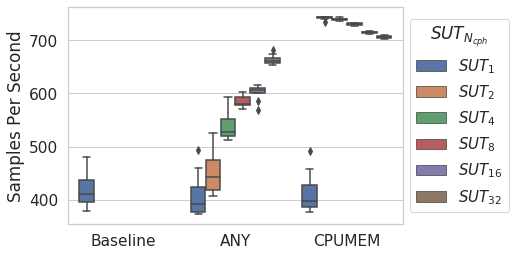

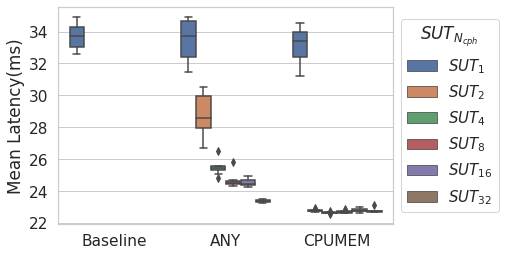

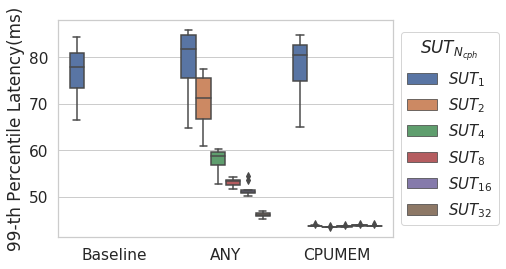

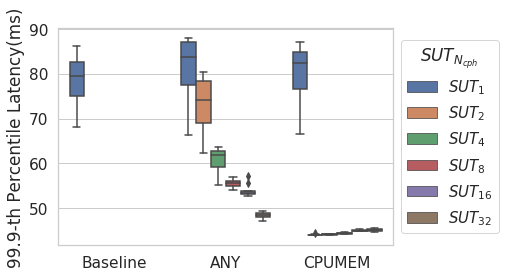

In [123]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF
from reportlab.pdfgen import canvas

from numpy import percentile, mean, std
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode, iplot

import plotly.io as pio
pio.templates.default = "none"
# pio.templates.default = "simple_white"

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
# import plotly.express as px

# import seaborn library
import seaborn as sns
legend=['$SUT_{1}$','$SUT_{2}$','$SUT_{4}$','$SUT_{8}$','$SUT_{16}$','$SUT_{32}$']
ylabel=['Samples Per Second','Mean Latency(ms)','99-th Percentile Latency(ms)','99.9-th Percentile Latency(ms)']

label=0
for x in ['qps','mean','p99','p999']:
    for cbatch in [8]:
        for model_name in ['resnet']:
            list_traces = []
            for env in ['baseline','none','cpumemory']:
    #             for numctn in [1,2,4,8,16,32]: 
                dfg_bench = dfg[(dfg['benchmark']== model_name)  & (dfg['cbatch']==cbatch) & \
    #                             (dfg['numctn']==numctn) &\
                            ((dfg['k8senv']==env))]
    #             print(dfg_bench['k8senv'])
                list_traces.append(dfg_bench)
            dfall = pd.concat(list_traces, axis=0, ignore_index=True)
            ax = sns.boxplot(x = dfall['k8senv'],
                        y = dfall[x],
                        hue = dfall['numctn'])
            handles, _ = ax.get_legend_handles_labels()
            ax.legend(handles, legend, prop={'size': 15}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5))
            ax.set_xticklabels(["Baseline","ANY","CPUMEM"])
            plt.xlabel("")
            plt.ylabel(ylabel[label])
            label=label+1
#             plt.title("Offline")
            plt.savefig('o-metric'+x+'.pdf',bbox_inches='tight')  
            plt.show()


In [124]:
df = dfg

In [125]:
from numpy import percentile, median, std

l_gb = ['benchmark', 'k8senv', 'sbatch','numctn','cscenario','cbatch']

df_results = []

for model_name in df['cbatch'].unique():
       df_bench = df[(df['cbatch']==model_name)] # everybenchmark
       for senario in df_bench.k8senv.unique():
            df_senario = df_bench[df_bench.k8senv == senario]
            df_base=df_senario[df_senario.numctn == 1]
            base=median(df_base['p999'])
            print(base)
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'model_time_median' : median(x['p999']),
                  'increment' : (median(x['p999'])-base)/base,
              })).reset_index()
            df_results.append(df_senario)

83.7256390905
79.590797379
82.3479718445


In [126]:
df_results = pd.concat(df_results, axis=0)
df_results

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,model_time_median,increment
0,resnet,none,32,1,offline,8,83.725639,0.000000
1,resnet,none,32,2,offline,8,74.066064,-0.115372
2,resnet,none,32,4,offline,8,61.849293,-0.261286
3,resnet,none,32,8,offline,8,55.706930,-0.334649
4,resnet,none,32,16,offline,8,53.404765,-0.362146
5,resnet,none,32,32,offline,8,48.506912,-0.420644
0,resnet,baseline,32,1,offline,8,79.590797,0.000000
0,resnet,cpumemory,32,1,offline,8,82.347972,0.000000
1,resnet,cpumemory,32,2,offline,8,44.027181,-0.465352
2,resnet,cpumemory,32,4,offline,8,44.183582,-0.463453


In [127]:
from numpy import percentile, median, std

l_gb = ['benchmark', 'k8senv', 'sbatch','numctn','cscenario','cbatch','model_time_median','increment']

df_results1 = []

for ctn in df_results.numctn.unique():
    df_senario = df_results[(df_results.numctn == ctn) &(df_results.cbatch == 8)]
    df_base=df_senario[df_senario.k8senv == 'none']
    base=float(df_base['model_time_median'])
    print(base)
    df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
          'affinity' : (float(x['model_time_median'])-base)/base,
      })).reset_index()
    df_results1.append(df_senario)

df_results1 = pd.concat(df_results1, axis=0)
df_results1

83.7256390905
74.0660636775
61.84929251
55.7069296055
53.404764698
48.506912248


,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,model_time_median,increment,affinity
0,resnet,none,32,1,offline,8,83.725639,0.000000,0.000000
1,resnet,baseline,32,1,offline,8,79.590797,0.000000,-0.049386
2,resnet,cpumemory,32,1,offline,8,82.347972,0.000000,-0.016455
0,resnet,none,32,2,offline,8,74.066064,-0.115372,0.000000
1,resnet,cpumemory,32,2,offline,8,44.027181,-0.465352,-0.405569
0,resnet,none,32,4,offline,8,61.849293,-0.261286,0.000000
1,resnet,cpumemory,32,4,offline,8,44.183582,-0.463453,-0.285625
0,resnet,none,32,8,offline,8,55.706930,-0.334649,0.000000
1,resnet,cpumemory,32,8,offline,8,44.424166,-0.460531,-0.202538
0,resnet,none,32,16,offline,8,53.404765,-0.362146,0.000000


In [119]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
SCEN=[
    'none-resnet-1-32-O-8-1',
      'none-resnet-2-32-O-8-1',
            'none-resnet-4-32-O-8-1',
           'none-resnet-8-32-O-8-1',
      'none-resnet-16-32-O-8-1',
      'none-resnet-32-32-O-8-1'
]
x=0
for add in SCEN:
    df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/"+add+"/mlperf_log_trace.json")
    df1 = df[df["name"].isin(["IssueQuery"])]
    print(df1)
#     ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
#     ax.set_title('IssueQuery duration (usec)');
#     x=x+1
#     plt.show()

# df1['delta'].describe()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-1-32-O-8-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
               ts        name           dur  issue_start_ns  complete_ns  \
25344  189723.174  IssueQuery  4.251347e+07             NaN          NaN   

       issue_to_done  
25344            NaN  
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-2-32-O-8-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
               ts        name           dur  issue_start_ns  complete_ns  \
25344  152454.534  IssueQuery  3.733985e+07             NaN          NaN   

       issue_to_done  
25344            NaN  
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-4-32-O-8-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
               ts        name           dur  issue_start_ns  complete_ns  \
25353  202966.83

In [97]:
# # for SingleStream
# if True:
#     df1 = df[df["name"].isin(["QuerySamplesComplete"])]
#     ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
#     ax.set_title('Inference time (usec)');
#     plt.show()
#     ax = df1['dur'].plot(figsize=figsize)
#     ax.set(ylim=(0, 600))
#     ax.set_title('Individual inference time (usec)');

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/cpumemory-resnet-1-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096
381.122
4.6155
5.756118164062495
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/cpumemory-resnet-2-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096
91.881
4.9285
5.874978027343753
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/cpumemory-resnet-4-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096
88.314
5.5535
6.496231445312529
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/cpumemory-resnet-8-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096
260.795
4.8774999999999995
5.901373779296873
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/cpumemory-resnet-16-32-O-8-10/mlperf_

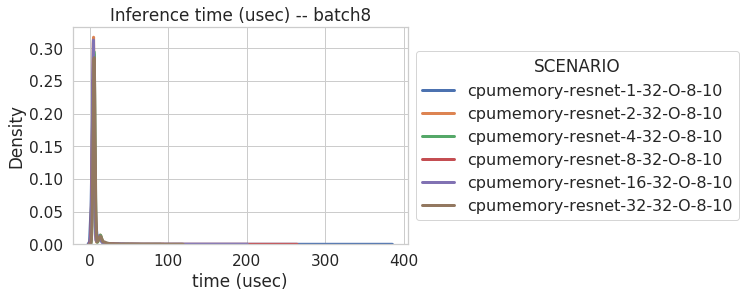

In [19]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
for hardware in ['cpumemory']:
#     for batch in ['1','2','4','8','16','32']:
    for batch in ['8']:
        SCEN=[
            hardware+'-resnet-1-32-O-'+batch+'-10',
              hardware+'-resnet-2-32-O-'+batch+'-10',
                    hardware+'-resnet-4-32-O-'+batch+'-10',
                   hardware+'-resnet-8-32-O-'+batch+'-10',
              hardware+'-resnet-16-32-O-'+batch+'-10',
              hardware+'-resnet-32-32-O-'+batch+'-10'
        ]
        x=0
        for add in SCEN:
            df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/"+add+"/mlperf_log_trace.json")
            df1 = df[df["name"].isin(["QuerySamplesComplete"])]
            print(len(df1))
            print(max(df1['dur']))
            print(np.median(df1['dur']))
            print(np.mean(df1['dur']))
        #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
        #     ax.set_title('Inference time (usec)');
        #     x = x+1
        #     plt.show()

            # Draw the density plot
            sns.distplot(df1['dur'], hist = False, kde = True,
                         kde_kws = {'linewidth': 3},
                         label = SCEN[x])
            x=x+1

        # Plot formatting
        plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
        plt.title('Inference time (usec) -- batch'+str(batch))
        plt.xlabel('time (usec)')
        plt.ylabel('Density')
        plt.show()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-1-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-2-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-4-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-8-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-16-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-32-32-O-8-10/mlperf_log_trace.json'

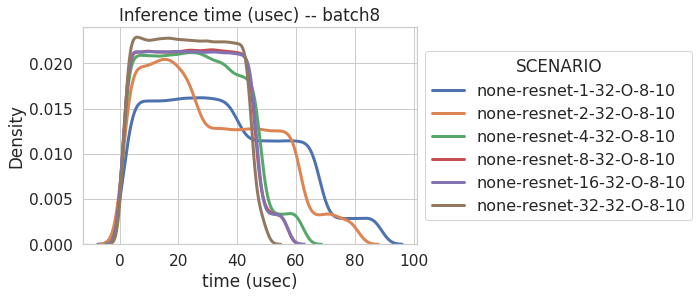

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/cpumemory-resnet-1-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/cpumemory-resnet-2-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/cpumemory-resnet-4-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/cpumemory-resnet-8-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/cpumemory-resnet-16-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/cpumemory-resnet-32-32

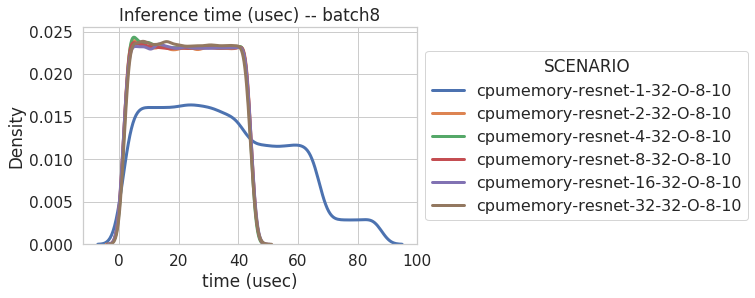

In [111]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
legend=["baseline","ANY-1ctn","ANY-2ctn","ANY-4ctn","ANY-8ctn","ANY-16ctn","ANY-32ctn"]

for hardware in ['none','cpumemory']:
#     for batch in ['1','2','4','8','16','32']:
    for batch in ['8']:
        SCEN=[
                hardware+'-resnet-1-32-O-'+batch+'-10',
                  hardware+'-resnet-2-32-O-'+batch+'-10',
                        hardware+'-resnet-4-32-O-'+batch+'-10',
                       hardware+'-resnet-8-32-O-'+batch+'-10',
                  hardware+'-resnet-16-32-O-'+batch+'-10',
                  hardware+'-resnet-32-32-O-'+batch+'-10'
            ]
        x=0
        for add in SCEN:
            df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/"+add+"/mlperf_log_trace.json")
            df1 = df[df["name"].isin(["Sample"])]
    #         print(max(df1['dur']))
    #         print(np.median(df1['dur']))
    #         print(np.mean(df1['dur']))
        #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
        #     ax.set_title('Inference time (usec)');
        #     x = x+1
        #     plt.show()

            # Draw the density plot
            sns.distplot(df1['issue_to_done'], hist = False, kde = True,
                         kde_kws = {'linewidth': 3},
                         label = SCEN[x])
            x=x+1

        # Plot formatting
        plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
        plt.title('Inference time (usec) -- batch'+str(batch))
        plt.xlabel('time (usec)')
        plt.ylabel('Density')
        plt.show()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-1-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-2-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-4-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-8-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-16-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-32-32-O-8-

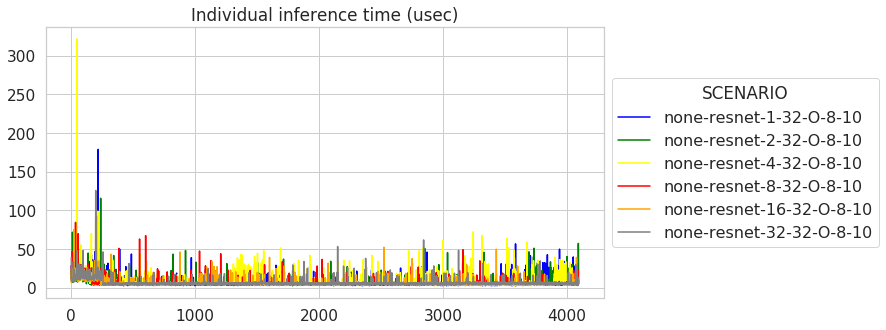

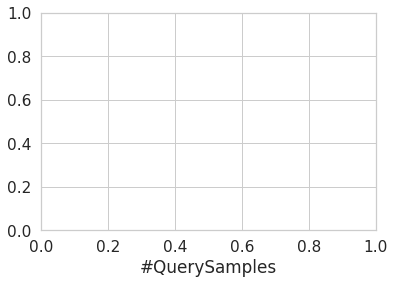

In [26]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
for batch in ['8']:
# for batch in ['1','2','4','8','16','32']:
    SCEN=[
        'none-resnet-1-32-O-'+batch+'-10',
          'none-resnet-2-32-O-'+batch+'-10',
                'none-resnet-4-32-O-'+batch+'-10',
               'none-resnet-8-32-O-'+batch+'-10',
          'none-resnet-16-32-O-'+batch+'-10',
          'none-resnet-32-32-O-'+batch+'-10'
    ]
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["QuerySamplesComplete"])]
        print(len(df1))
#         df1.sort_values("dur",inplace=True)
        df1.reset_index(drop=True,inplace=True)
#         df1.sort_index(inplace=True)
#         df1.reset_index(drop=True,inplace=True)
        
        ax = df1['dur'].plot(figsize=figsize, color=color[x],label = SCEN[x])
        ax.set_title('Individual inference time (usec)');
#         ax.set(xlim=(0, 256))
#         ax.set(ylim=(0, 10))
        x=x+1
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.show()
    plt.xlabel('#QuerySamples')

In [132]:
df1 = df[df["name"].isin(["Sample"])]
len(df1)

32768

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3-baseline/none-resnet-1-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-1-32-O-8-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-2-32-O-8-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-4-32-O-8-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-8-32-O-8-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-16-32-O-8-3/mlperf_log_trace.js

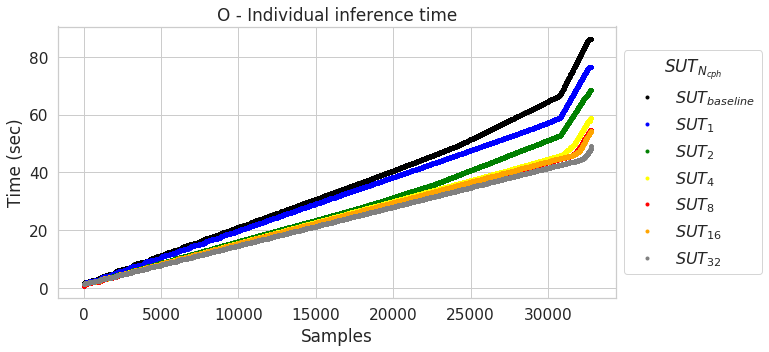

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3-baseline/none-resnet-1-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/cpumemory-resnet-1-32-O-8-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/cpumemory-resnet-2-32-O-8-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/cpumemory-resnet-4-32-O-8-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/cpumemory-resnet-8-32-O-8-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/cpumemory-resnet-16-32-

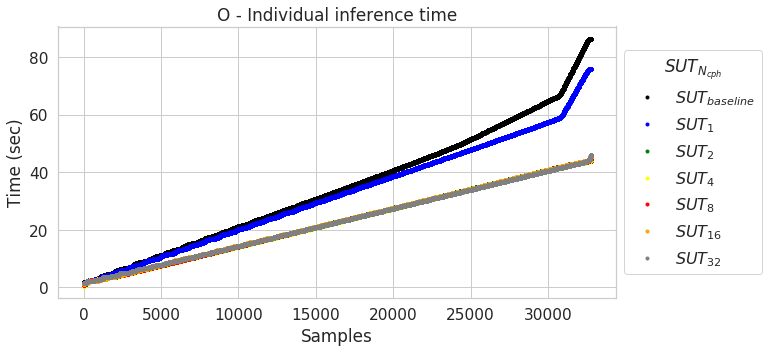

In [106]:
BINS=12
color=["black","blue","green","yellow","red","orange","grey"]
legend=['$SUT_{baseline}$','$SUT_{1}$','$SUT_{2}$','$SUT_{4}$','$SUT_{8}$','$SUT_{16}$','$SUT_{32}$']
for hardware in ['none','cpumemory']:
#     for batch in ['1','2','4','8','16','32']:
    for batch in ['8']:
        SCEN=[
                hardware+'-resnet-1-32-O-'+batch+'-3',
                  hardware+'-resnet-2-32-O-'+batch+'-3',
                        hardware+'-resnet-4-32-O-'+batch+'-3',
                       hardware+'-resnet-8-32-O-'+batch+'-3',
                  hardware+'-resnet-16-32-O-'+batch+'-3',
                  hardware+'-resnet-32-32-O-'+batch+'-3'
            ]
        x=0
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3-baseline/none-resnet-1-32-O-8-10/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Sample"])]
        df1.sort_index(inplace=True)
        df1.reset_index(drop=True,inplace=True)
        ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x],marker='.', linestyle='none')
    #     ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x])
        x=x+1
        for add in SCEN:
            df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/"+add+"/mlperf_log_trace.json")
            df1 = df[df["name"].isin(["Sample"])]
    #         print(df1)
    #         print(len(df1))

    #         df1.sort_values("issue_to_done",inplace=True)
    #         df1.reset_index(drop=True,inplace=True)

            df1.sort_index(inplace=True)
            df1.reset_index(drop=True,inplace=True)

    #         print(df2)
    #         print(len(df1))
            ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x],marker='.', linestyle='none')
            ax.set_title('Individual inference time (sec)');
    #         ax.set(ylim=(0, 3))
#             ax.set(xlim=(30000, 32768))
            x=x+1
        plt.legend(prop={'size': 16}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5) )
        plt.title('O - Individual inference time')
        plt.xlabel('Samples')
        plt.ylabel('Time (sec)')
        plt.savefig('o-itd'+hardware+'.png',bbox_inches='tight')  
        plt.show()
#         plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
#         plt.show()
#         plt.xlabel('#QuerySamples')

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-1-32-O-8-5/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-2-32-O-8-5/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-4-32-O-8-5/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-8-32-O-8-5/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-16-32-O-8-5/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/none-resnet-32-32-O-8-5/mlperf_log_trace.json' mode=

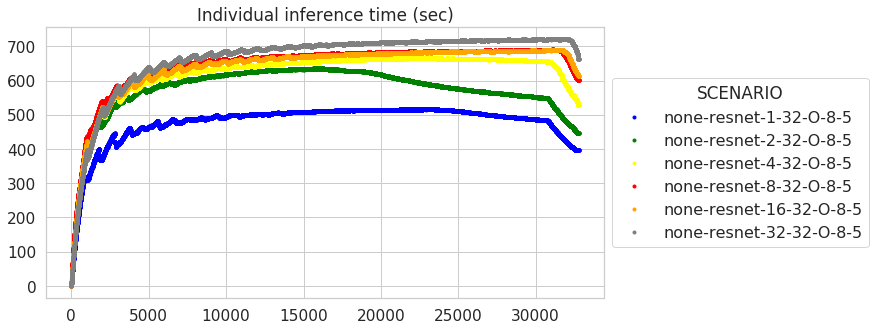

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/cpumemory-resnet-1-32-O-8-5/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/cpumemory-resnet-2-32-O-8-5/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/cpumemory-resnet-4-32-O-8-5/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/cpumemory-resnet-8-32-O-8-5/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/cpumemory-resnet-16-32-O-8-5/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/cpumemory-resnet-32-32-O-8-

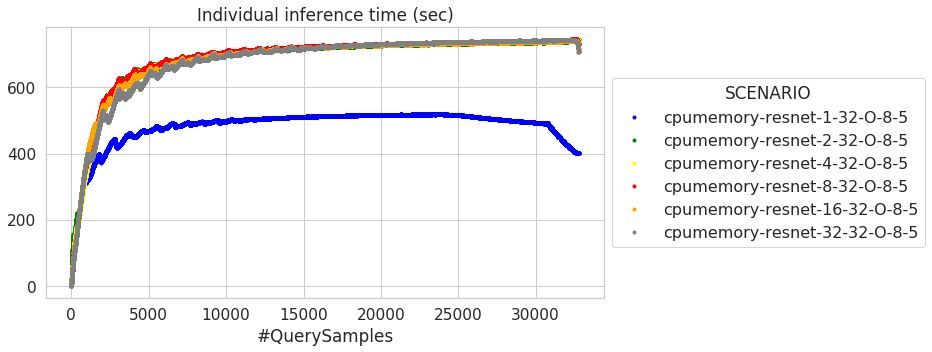

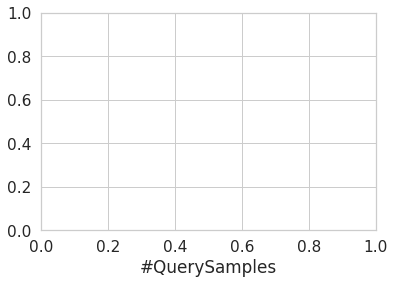

In [109]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
for hardware in ['none','cpumemory']:
#     for batch in ['1','2','4','8','16','32']:
    for batch in ['8']:
        SCEN=[
                hardware+'-resnet-1-32-O-'+batch+'-5',
                  hardware+'-resnet-2-32-O-'+batch+'-5',
                        hardware+'-resnet-4-32-O-'+batch+'-5',
                       hardware+'-resnet-8-32-O-'+batch+'-5',
                  hardware+'-resnet-16-32-O-'+batch+'-5',
                  hardware+'-resnet-32-32-O-'+batch+'-5'
            ]
        x=0
        for add in SCEN:
            df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp3/"+add+"/mlperf_log_trace.json")
            df1 = df[df["name"].isin(["Sample"])]
    #         print(df1)
    #         print(len(df1))

    #         df1.sort_values("issue_to_done",inplace=True)
    #         df1.reset_index(drop=True,inplace=True)

            df1.sort_index(inplace=True)
            df1.reset_index(inplace=True)
            df1.reset_index(inplace=True)
            df1["level_0"] = df1["level_0"] / df1['issue_to_done']

    #         print(df2)
    #         print(len(df1))
            ax = df1['level_0'].plot(figsize=figsize, color=color[x],label = SCEN[x],marker='.', linestyle='none')
            ax.set_title('Individual inference time (sec)');
    #         ax.set(ylim=(0, 3))
#             ax.set(xlim=(30000, 32768))
            x=x+1
        plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
        plt.show()
        plt.xlabel('#QuerySamples')

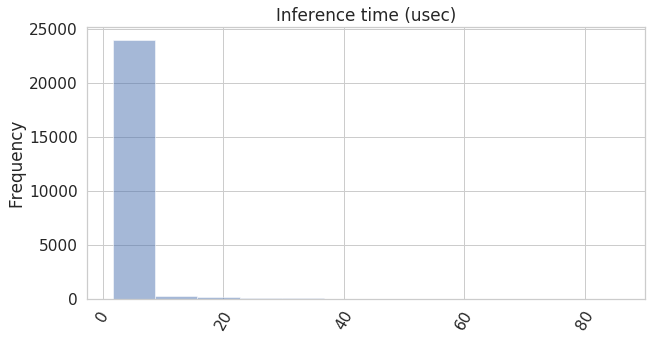

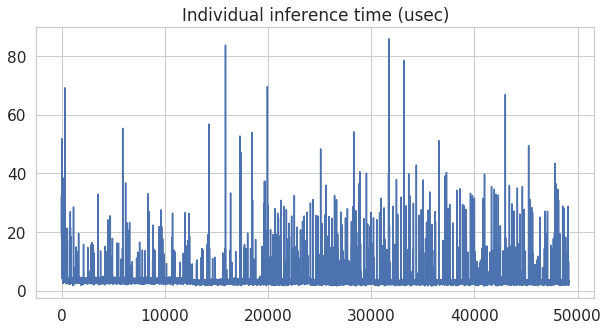

In [312]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Inference time (usec)');
#ax.set(xlim=(0, 25000))
plt.xticks(rotation=60)
plt.show()

ax = df1['dur'].plot(figsize=figsize)
ax.set_title('Individual inference time (usec)');
#ax.set(ylim=(0, 200))
plt.show()


# df1['issue_to_done'].describe()

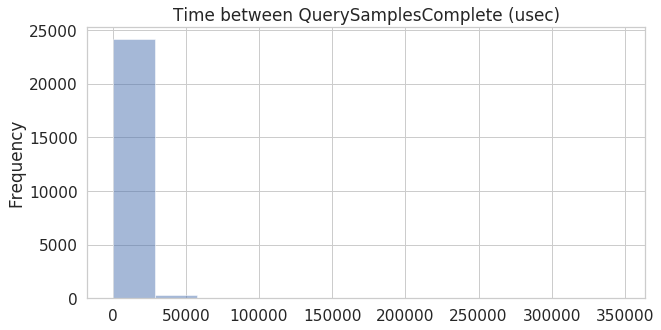

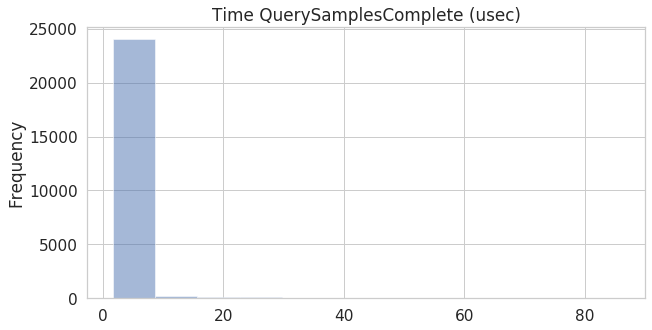

In [313]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1['delta'] = df1['ts'].diff()
ax = df1['delta'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time between QuerySamplesComplete (usec)');
plt.show()

ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time QuerySamplesComplete (usec)');